## ESTATÍSTICA 
## Material Consolidado

In [5]:
import numpy as np
from math import sqrt, exp
from statistics import stdev

In [6]:
from scipy.stats import binom, poisson

In [7]:
from stats import binomial as bi
from stats import exponencial as xp
from stats import poisson as po
from stats import normal as nm
from stats import inferencia as inf
from stats import hipoteses as hip

## ESTATÍSTICA DESCRITIVA

In [20]:
m = np.array([180, 184, 185, 190, 190, 192])
h = np.array([192, 196, 200, 200, 200, 315])

In [21]:
print("Média dos Homens: {:8.2f}".format(h.mean()))
print("Média das Mulheres: {:8.2f}".format(m.mean()))
print("Mediana dos Homens: {:8.2f}".format(np.median(h)))
print("Mediana das Mulheres: {:8.2f}".format(np.median(m)))
print("Desvio padrão dos Homens: {:8.2f}".format(h.std(ddof=1)))
print("Desvio padrão das Mulheres: {:8.2f}".format(m.std(ddof=1)))
print("Coeficiente de variação dos Homens: {:8.2f}%".format(h.std(ddof=1)*100/h.mean()))
print("Coeficiente de variação das Mulheres: {:8.2f}%".format(m.std(ddof=1)*100/m.mean()))

Média dos Homens:   217.17
Média das Mulheres:   186.83
Mediana dos Homens:   200.00
Mediana das Mulheres:   187.50
Desvio padrão dos Homens:    48.04
Desvio padrão das Mulheres:     4.58
Coeficiente de variação dos Homens:    22.12%
Coeficiente de variação das Mulheres:     2.45%


### Escore z

In [22]:
escorez = lambda x, xa, s : (x - xa)/s
zm = escorez(180, m.mean(), m.std(ddof=1))
zh = escorez(350, h.mean(), h.std(ddof=1))
print("Escore z para uma mulher com 180 de colesterol: {:8.2f}".format(zm))
print("Escore z para um homem com 350 de colesterol: {:8.2f}".format(zh))

Escore z para uma mulher com 180 de colesterol:    -1.49
Escore z para um homem com 350 de colesterol:     2.77


### Inversa do Escore z

In [8]:
consumidores = np.array([71, 73, 73, 74, 74, 75, 76, 77, 77, 79, 81, 83])

In [9]:
escorez_x = lambda escorez, s, xa : escorez*s + xa

In [11]:
print(escorez_x(1, consumidores.std(ddof=1), consumidores.mean()))
print(escorez_x(-0.5, consumidores.std(ddof=1), consumidores.mean()))

79.61135965083291
74.31932017458354


### Percentis

In [25]:
p25 = np.percentile(m, 25)
print("25% das mulheres apresentaram coleterol infoerior a {:5.2f}".format(p25))

25% das mulheres apresentaram coleterol superior a 184.25


In [26]:
p60 = np.percentile(h, 60)
print("40% dos homens apresentaram coleterol superior a {:5.2f}".format(p60))

40% dos homens apresentaram coleterol superior a 200.00


## MODELOS PROBABILÍSTICOS - VARIÁVEIS DISCRETAS

## Distribuição Binomial

### Exemplo 1

In [4]:
n = 14
p = 0.6
x = 3
bi.exibir_binom_stats(n, p)
bi.binom_prob(n, p, x)

Média: 8.4, Variância: 3.3600000000000003, Desvio: 1.8330302779823362


0.0033

### Exemplo 2

In [5]:
n = 14
p = 0.6
x1 = 13
x2 = 14
bi.exibir_binom_stats(n, p)
bi.binom_prob(n, p, x1) + bi.binom_prob(n, p, x2)

Média: 8.4, Variância: 3.3600000000000003, Desvio: 1.8330302779823362


0.0081

## Distribuição de Poisson

In [6]:
mu = 5*8 # 5 por hora para 8 horas
po.exibir_poisson_stats(mu)
po.poisson_prob(mu, 50)

Média: 40.0, Variância: 40.0, Desvio: 6.324555320336759


0.0177

## MODELOS PROBABILÍSTICOS - VARIÁVES CONTÍNUAS

## Distribuição Exponencial

In [7]:
alpha = 3
a = 0
b = 1
xp.exibir_exp_stats(alpha)
xp.exp_prob(a, b, alpha)

Média: 0.3333333333333333, Variância: 0.1111111111111111


0.9502

## Distribuição Normal

### Exemplo 1

In [8]:
med = 1.7
dp = 0.025
x = 1.65
z = nm.reduzir_normal_padrao(x, med, dp)
print("z={:6.4f}".format(z))
prob = 0.5 + 0.4772
print("Resposta: {:6.4f}".format(prob)) 

z=-2.0000
Resposta: 0.9772


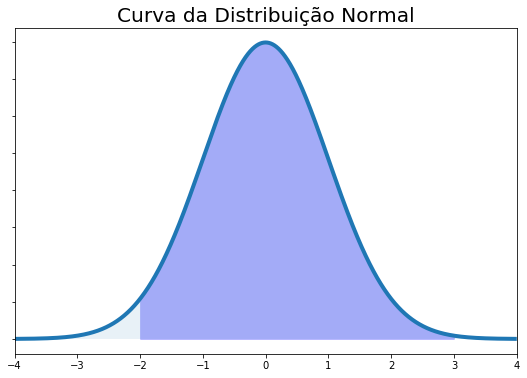

In [9]:
nm.plotar_normal(z, 3)

### Exemplo 2

In [10]:
med = 7.505
dp = 0.01
x1 = 7.48
x2 = 7.52
z1 = nm.reduzir_normal_padrao(x1, med, dp)
z2 = nm.reduzir_normal_padrao(x2, med, dp)
print("z={:6.4f}".format(z1))
print("z={:6.4f}".format(z2))
prob = 0.4938 + 0.4332
print("Resposta: {:6.4f}".format(prob)) 

z=-2.5000
z=1.5000
Resposta: 0.9270


### Exemplo 3

In [25]:
med = 130
dp = 20
z1 = -0.67
z2 = 0.67
x1 = nm.reverter_reducao_normal_padrao(z1, med, dp)
x2 = nm.reverter_reducao_normal_padrao(z2, med, dp)
print("x1 = {:6.4f} e x2 = {:6.4f}".format(x1,x2))

x1 = 116.6000 e x2 = 143.4000


## INFERENCIA

## Tamanho da amostra  - MÉDIA(população infinita)

In [13]:
sigma = sqrt(0.1764)
alpha = 0.01 # 99%
z =2.57
e = 0.05
n = inf.media_tamanho_amostra(z, sigma, e)
print("Tamanho recomendado da amostra: {:6.4f}".format(n))

Tamanho recomendado da amostra: 467.0000


## Tamanho da amostra  - MÉDIA(população finita)

In [14]:
sigma = 7000 
z = 1.64
e = 600
n = inf.media_tamanho_amostra(z, sigma, e)
print("Tamanho recomendado da amostra: {:6.4f}".format(n))

Tamanho recomendado da amostra: 367.0000


## Tamanho da amostra - PROPORÇÃO (população infinita)

In [15]:
z = 1.64
pa = 0.5
e = 0.025
n = inf.prop_tamanho_amostra(z, pa, e)
print("Tamanho recomendado da amostra: {:6.4f}".format(n))

Tamanho recomendado da amostra: 1076.0000


## Tamanho da amostra - PROPORÇÃO (população finita)

In [16]:
N = 1286
z = 1.64
pa = 0.5
e = 0.04
n = inf.prop_tamanho_amostra(z, pa, e, N)
print("Tamanho recomendado da amostra: {:6.4f}".format(n))

Tamanho recomendado da amostra: 317.0000


## TESTES DE HIPÓTESES

## Teste t para uma média (desvio desconhecido)

In [17]:
# H0: med <= 7 
# Ha: med > 7 

xhat = 7.25
mu0 = 7
s = 1.052
alpha = 0.05
n = 27
tt = hip.media_testet(xhat, mu0, s, n)
tt

1.2348

## Teste t para duas médias (amostras dependentes)

In [18]:
x = np.array([16, 15, 11, 20, 19, 14, 13, 15, 14, 16])
y = np.array([13, 13, 12, 16, 16, 11, 10, 15, 9, 16])
di = x - y
print(x)
print
print(y)
print(di)

[16 15 11 20 19 14 13 15 14 16]
[13 13 12 16 16 11 10 15  9 16]
[ 3  2 -1  4  3  3  3  0  5  0]


In [19]:
n = len(di)
di_med = di.mean()
di_std = di.std(ddof = 1)
print("n: {:6} Média di: {:10.4f} Desvio Padrão di: {:10.4f}".format(n, di_med, di_std))

n:     10 Média di:     2.2000 Desvio Padrão di:     1.9322


In [20]:
tp = hip.media_testet_amostras_dependentes(di_med, di_std, n)
tp

3.6006

## Teste F para comparação de duas variâncias

In [21]:
n1 = 28
n2 = 22
s1 = 150**2
s2 = 125**2
F = s1/s2
FL = 1/2.201
FR = 2.272
print("F: {:6.4} FL: {:6.4}  FR: {:6.4} ".format(F, FL, FR))

F:   1.44 FL: 0.4543  FR:  2.272 


## Teste t para duas médias (amostras independentes)

#### Populações Homocedásticas

In [22]:
n1 = 28
n2 = 22 
s1 = 150**2
s2 = 125**2
x1 = 1025
x2 = 910
t = hip.media_testet_amostras_independentes(x1, x2, n1, n2, s1, s2, True)
gl = n1 + n2 -2
print("Graus de liberdade: {}".format(gl))
print("t = {:6.4f}".format(t))

Graus de liberdade: 48
t = 2.8912


#### Populações Heterocedásticas

In [23]:
n1 = 28
n2 = 22 
s1 = 150**2
s2 = 125**2
x1 = 0.81
x2 = 0.78
t = hip.media_testet_amostras_independentes(x1, x2, n1, n2, s1, s2, False)
gl = 35
print("Graus de liberdade: {}".format(gl))
print("t = {:6.4f}".format(t))

Graus de liberdade: 35
t = 0.0008
